In [2]:
from src.FunctionsSurface import *
import matplotlib.pyplot as plt

In [3]:
# Separate files to surface
N__ = [5000, 10000, 20000, 40000, 80000]
dim = [1,2,3,4]

for j in N__:
    for i in dim:
        parms =  [k for k in list_all_folders(j,i)]        
        for l in range(len(parms)):
            all_properties_dataframe(j, i, parms[l][0], parms[l][1])

In [3]:
alpha_a = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
alpha_g = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

for n in N__:
    for d in dim:
        for g in alpha_g:
            for a in alpha_a:
                alpha_G = list_all_folders_for_alpha_fixed(n, d , a, g, alpha_g_variable=True)
                create_all_properties_file(n, d, a, alpha_G, alpha_g_variable=True)

    for d in dim:
        for a in alpha_a:
            for g in alpha_g:
                alpha_A = list_all_folders_for_alpha_fixed(n, d , a, g, alpha_g_variable=False)
                create_all_properties_file(n, d, alpha_A, g, alpha_g_variable=False)

In [14]:
import numpy as np
from scipy.optimize import minimize_scalar

# Define the function Y = A * log(x)
def Y(x, A):
    return np.log(x**A)

# Define the objective function to minimize (the absolute value of Y(x_L))
def objective(x, A):
    #if x <= 0:
        #return np.inf  # Return infinity if x is non-positive to avoid evaluation of log(0)
    return np.abs(Y(x, A))

# Define the initial guess for x_L
x_initial_guess = 1.0

# Define the value of A with error
A = 0.028315037796630377  # You should replace this with your actual value of A

# Minimize the objective function to find the value of x_L
result = minimize_scalar(objective, args=(A,), bounds=(5000, 320000))

# Extract the value of x_L where Y(x_L) = 0
x_L = result.x
x = np.linspace(5000, 320000, 1000)
y = Y(x,A)
for i in range(len(x)):
    if(Y(x[i],A) <= 0):
        print("ok")
#$values = [(i,j) for i,j in zip(x,y)]

#print("Value of x_L:", x_L)
#print(values)


In [58]:
all_data = pd.read_csv(f"../../data/all_data_filter.csv", sep = ',')
all_data.head()

,alpha_a,alpha_g,n_size,dim,short_mean,diameter_mean,ass_coeff_mean,short_err,diameter_err,ass_coeff_err,n_samples
0,3.0,0.1,20000,4,95.185838,253.619048,-0.269746,3.787748,9.508011,0.001209,21
1,2.0,0.1,20000,4,62.093195,163.761905,-0.242202,1.259514,4.412593,0.001956,21
2,9.0,4.0,20000,4,14.208324,34.714286,-0.018333,0.092836,0.526185,0.001656,21
3,2.0,8.0,20000,4,9.689103,27.095238,-0.044656,0.105900,0.266411,0.001598,21
4,7.0,4.0,20000,4,13.373938,32.904762,-0.040303,0.116930,0.377364,0.001891,21


In [104]:
all_data_filter = filter_dataframe(all_data)
all_data_filter.head()

C:\Users\mauri\AppData\Local\Temp\ipykernel_2308\4169064614.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, mask_alpha_a], ignore_index=True)


,alpha_a,alpha_g,n_size,dim,short_mean,diameter_mean,ass_coeff_mean,short_err,diameter_err,ass_coeff_err,n_samples
0,0.0,5.0,20000,4,10.091799,27.095238,-0.050876,0.091923,0.337390,0.002933,21
1,0.0,1.0,20000,4,9.917034,27.285714,-0.047732,0.097390,0.317302,0.002197,21
2,0.0,4.0,20000,4,10.004558,27.142857,-0.050495,0.104922,0.332993,0.002182,21
3,0.0,2.0,20000,4,10.064170,27.310559,-0.049173,0.029914,0.107880,0.000642,322
4,0.0,9.0,20000,4,9.856383,26.619048,-0.044308,0.074967,0.368240,0.001762,21


In [122]:
List_N = [5000, 10000, 20000, 40000]
df = beta_all(all_data_filter, List_N)
#df.sort_values(by='dim', key=lambda col: col.astype(float))

In [114]:
df_1d = df[df["dim"]==1]
df_2d = df[df["dim"]==2]
df_3d = df[df["dim"]==3]
df_4d = df[df["dim"]==4]

,alpha_a,alpha_g,dim,beta_short,beta_diameter,beta_assortativity,beta_short_err,beta_diameter_err,beta_assortativity_err
0,9.0,1.0,1,4.710353,12.346017,0.007756,0.113179,0.466708,0.000734
19,5.0,1.0,1,4.262624,11.637911,0.009680,0.134706,0.505333,0.001118
22,8.0,8.0,1,3.426628,8.131175,0.010133,0.555690,1.851440,0.001954
23,3.0,7.0,1,4.369306,13.919393,0.016325,0.475401,1.037500,0.004780
28,7.0,8.0,1,5.044762,13.599145,0.009865,0.579804,1.426623,0.002111
...,...,...,...,...,...,...,...,...,...
377,8.0,5.0,1,4.446268,10.599671,0.011980,0.256275,0.226716,0.003326
378,3.0,4.0,1,3.987656,11.080959,0.015254,0.453204,1.496204,0.004172
384,7.0,5.0,1,5.308401,15.193451,0.009243,0.141122,0.659079,0.003954
386,1.0,8.0,1,2.926109,9.084858,0.042758,0.300491,1.216993,0.002914


In [168]:
import seaborn as sns
from matplotlib.colors import LogNorm  # Import LogNorm

def heatmap(dataframe, propertie = "beta_short", label_prop = r'$\beta_\ell$' ,dim = 1):
        # Example DataFrame with x, y, z values
        data = {'x': dataframe[dataframe["dim"] == dim]["alpha_a"].values,
                'y': dataframe[dataframe["dim"] == dim]["alpha_g"].values,
                'z': dataframe[dataframe["dim"] == dim][propertie].values}

        df_ = pd.DataFrame(data)
        
        df_ = df_.sort_values(by='y')
        
        # Pivot the DataFrame to prepare for heatmap
        pivot_df = df_.pivot(index='y', columns='x', values='z')
        
        # Plotting the heatmap
        #ax = sns.heatmap(pivot_df, cmap='coolwarm', norm=LogNorm())
        ax = sns.heatmap(pivot_df, cmap='coolwarm', yticklabels=sorted(df_['y'].unique()))
        cbar = ax.collections[0].colorbar
        cbar.set_label(label_prop, fontsize=18)
        
        # Adding title and labels
        plt.title(f'Dimension = {dim}')
        plt.xlabel(r'$\alpha_a$',fontsize=18)
        plt.ylabel(r'$\alpha_g$',fontsize=18)

        # Display the plot
        plt.show()

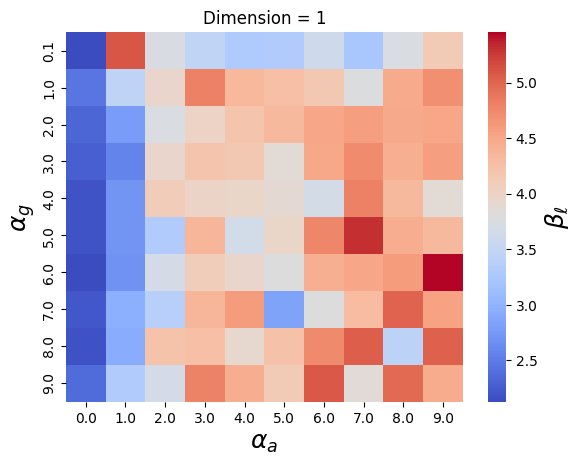

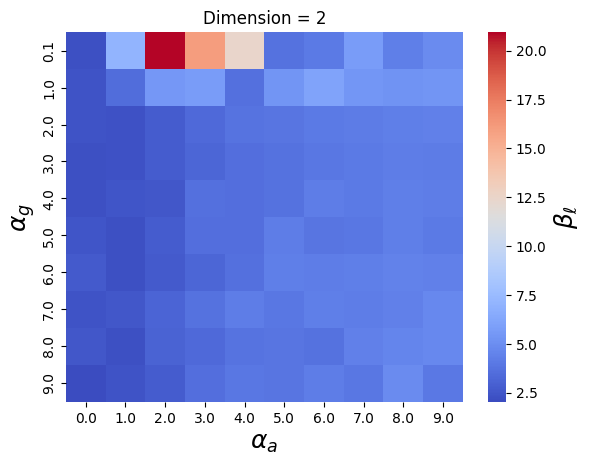

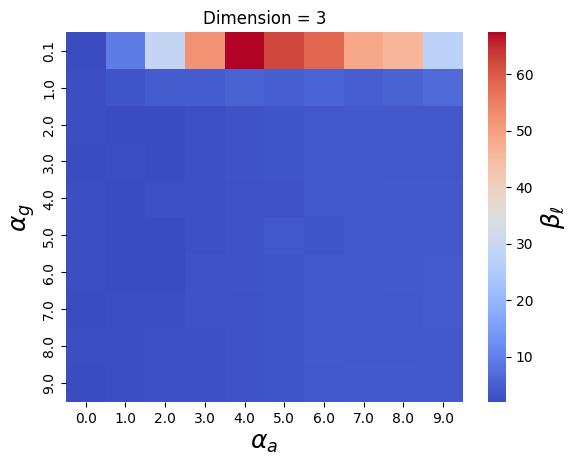

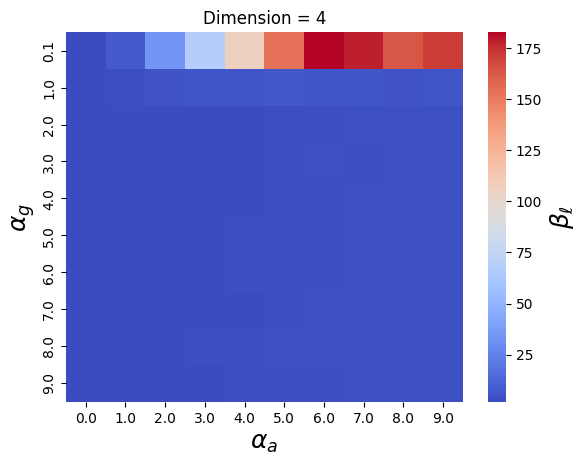

In [169]:
for d in [1,2,3,4]:
    heatmap(df,  dim = d)